In [1]:
from vcat import ImageData, ImageCube
from vcat.plots.kinematic_plot import KinematicPlot
import glob
from IPython.display import Video

2025-09-13 14:00:58,392 - INFO - vcat - Logging initialized. Log file: Console only
2025-09-13 14:00:58,393 - INFO - vcat - Using config file VCAT_CONFIG=/home/flep98/VCAT/vcat/config.yaml
2025-09-13 14:00:58,394 - INFO - vcat - Using DIFMAP Path: /usr/local/difmap/uvf_difmap_2.5g/
2025-09-13 14:00:58,394 - INFO - vcat - Using uv-weighting: [2, -1]
2025-09-13 14:00:58,394 - INFO - vcat - Using font: Quicksand
2025-09-13 14:00:58,395 - INFO - vcat - Using noise method: Histogram Fit
2025-09-13 14:00:58,395 - INFO - vcat - Using modelfit error method: Schinzel12
2025-09-13 14:00:58,395 - INFO - vcat - Using resolution limit method: Kovalev05


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


2025-09-13 14:00:59,896 - WARNING - astroquery - The fit may be unsuccessful; check fit_info['message'] for more information.
2025-09-13 14:00:59,898 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-09-13 14:01:00,190 - WARNING - vcat - No .uvfits file or difmap path provided. Calculating modelfit component SNR based on the clean map only.



Image of the source 3C111 at frequency 15.2 GHz on 2014-05-08 
    Total cleaned flux: 3474.345 mJy 
    Image Noise: 0.388 mJy using method 'Histogram Fit'
No polarization data loaded.
Model information: 
    Model Flux: 3472.457 mJy 
    Number of Components: 12


2025-09-13 14:01:03,112 - WARNING - astroquery - The fit may be unsuccessful; check fit_info['message'] for more information.
2025-09-13 14:01:03,114 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method


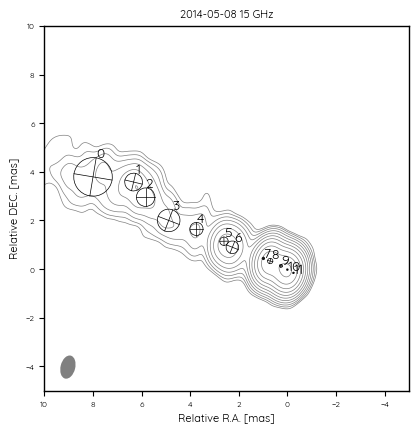

In [2]:
#Let's load an image with modelfit first
dataU=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits",
       model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit") #this can be either .fits or .mod file

#let's print some info and plot it with the modelcomps and automatically associated ids
print(dataU)
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

2025-09-13 14:01:07,802 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method


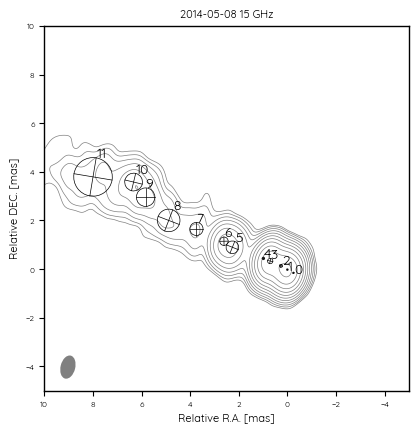

In [3]:
#Let's modify the component IDs and assign them to our liking.
#Let's first use a list of the old comp_ids
old_ids=[0,1,2,3,4,5,6,7,8,9,10,11]

#and now the new IDs that we want to assign them
new_ids=[11,10,9,8,7,6,5,4,3,2,1,0]

#and finally execute the change
dataU.change_component_ids(old_ids,new_ids)

#we also want to assign the core component to be comp 1
dataU.set_core_component(1)

#let's plot it again
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

In [4]:
#Let's check if the core assignment worked   
print(dataU.get_core_component())

Component with ID 1 at frequency 15.2 GHz
x: 0.00 mas, y:-0.02 mas
Maj: 0.06 mas, Min: 0.06 mas, PA: -141.33999633789062 °
Flux: 884.4209909439087 mJy, Distance to Core: 0.00 mas



In [5]:
#Similarly we can get info about any other component 
print(dataU.get_component(10))

Component with ID 10 at frequency 15.2 GHz
x: 6.33 mas, y:3.58 mas
Maj: 0.73 mas, Min: 0.73 mas, PA: -13.495699882507324 °
Flux: 59.241000562906265 mJy, Distance to Core: 7.28 mas



In [6]:
#Let's load some more data
dataC=ImageData("../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.fits",
        model="../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.mfit")
dataQ=ImageData("../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.fits",
        model="../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.mfit")
dataW=ImageData("../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.fits",
        model="../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.mfit")
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.mfit")

#Now we have to manually associate the components to the right ID, this is a bit tedious and will soon be replaced with a GUI version
#For now, let's use the following associations:

old_ids=[]
new_ids=[]
core_id=0

dataQ.change_component_ids(old_ids,new_ids)
dataQ.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=0

dataW.change_component_ids(old_ids,new_ids)
dataW.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=4

dataX.change_component_ids(old_ids,new_ids)
dataX.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=6

dataC.change_component_ids(old_ids,new_ids)
dataC.set_core_component(core_id)

2025-09-13 14:01:13,200 - WARNING - vcat - No .uvfits file or difmap path provided. Calculating modelfit component SNR based on the clean map only.
2025-09-13 14:01:14,553 - WARNING - vcat - No .uvfits file or difmap path provided. Calculating modelfit component SNR based on the clean map only.
2025-09-13 14:01:15,774 - WARNING - astroquery - The fit may be unsuccessful; check fit_info['message'] for more information.
2025-09-13 14:01:15,775 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-09-13 14:01:15,866 - WARNING - vcat - No .uvfits file or difmap path provided. Calculating modelfit component SNR based on the clean map only.
2025-09-13 14:01:18,428 - WARNING - astroquery - The fit may be unsuccessful; check fit_info['message'] for more information.
2025-09-13 14:01:18,430 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-09-13 14:01:18,760 - WARNING - vcat - No .uvfits file or difmap path provided. Calculating mo

2025-09-13 14:01:26,362 - WARNING - astroquery - The fit may be unsuccessful; check fit_info['message'] for more information.
2025-09-13 14:01:26,364 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-09-13 14:01:30,237 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-09-13 14:01:35,083 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method


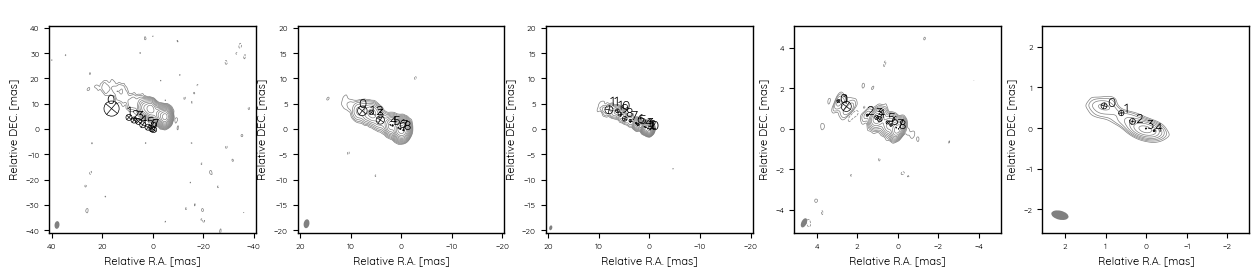

In [7]:
#Now that all components were correctly identified, we will load the images as an ImageCube for easier handling
im_cube=ImageCube([dataC,dataX,dataU,dataQ,dataW])

#let's double check the associations
im_cube.plot(plot_model=True,plot_comp_ids=True)

/home/flep98/VCAT/vcat/kinematics.py:664: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not isinstance(epochs, list) and epochs=="":
2025-09-13 14:01:36,515 - INFO - vcat - 2014.3479452054794
2025-09-13 14:01:36,515 - INFO - vcat - Fit component spectrum

2025-09-13 14:01:36,515 - INFO - vcat - Fit Powerlaw to Comp1
2025-09-13 14:01:36,516 - INFO - vcat - Fit SSA to Comp 1
2025-09-13 14:01:36,518 - INFO - vcat - ssa spectrum fits better

2025-09-13 14:01:36,528 - WARNING - vcat - Uncertainties for SN fit large, limit peak flux and freq 



fit_type=2
Beta: [0.01464061 0.24561745]
Beta Std Error: [0.01596209 0.31833935]
Beta Covariance: [[ 9.69205973e-06 -1.77759359e-04]
 [-1.77759359e-04  3.85493759e-03]]
Residual Variance: 26.288347977464714
Inverse Condition #: 0.019173820940794555
Reason(s) for Halting:
  Sum of squares convergence
fit_type=2
Beta: [14.56959837  0.18417954 -1.24837639]
Beta Std Error: [4.43204068 0.23236481 1.43866397]
Beta Covariance: [[ 0.91709073  0.03858178 -0.2348349 ]
 [ 0.03858178  0.00252084 -0.01496512]
 [-0.2348349  -0.01496512  0.09663258]]
Residual Variance: 21.418801925282686
Inverse Condition #: 0.04292401934132739
Reason(s) for Halting:
  Sum of squares convergence


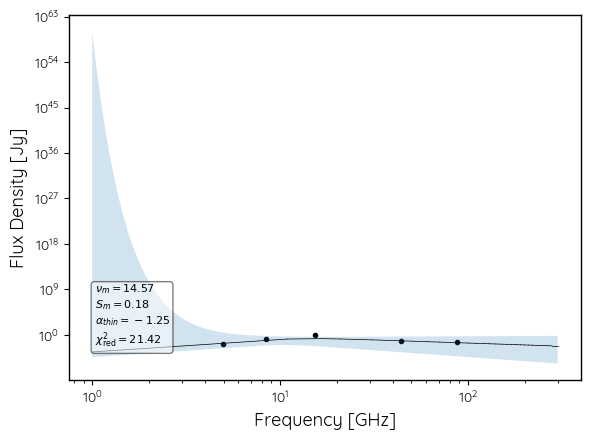

[{'fit': 'SN',
  'athin': -1.2483763902170963,
  'athinE': 1.4386639665648215,
  'athick': 2.5,
  'athickE': 0.0,
  'num': 14.56959837225006,
  'Sm': 0.18417954475289883,
  'chi2': 21.418801925282686,
  'SmE': 0.23236480573326637,
  'numE': 4.432040680557547,
  'fit_free_ssa': False,
  'sn_p': array([14.56959837,  0.18417954, -1.24837639]),
  'sn_sd': array([4.43204068, 0.23236481, 1.43866397])}]

In [8]:
#That looks good, let's see if we can fit a component spectrum to specific components
#We can call this directly on the image cube
comp_id=1
im_cube.fit_comp_spectrum(comp_id,plot=True)

/home/flep98/VCAT/vcat/kinematics.py:617: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if epochs=="":
2025-09-13 14:01:36,848 - INFO - vcat - Fitted k_r: 8.505466604851758
2025-09-13 14:01:36,849 - INFO - vcat - Fitted r0: 0.2989602461797234


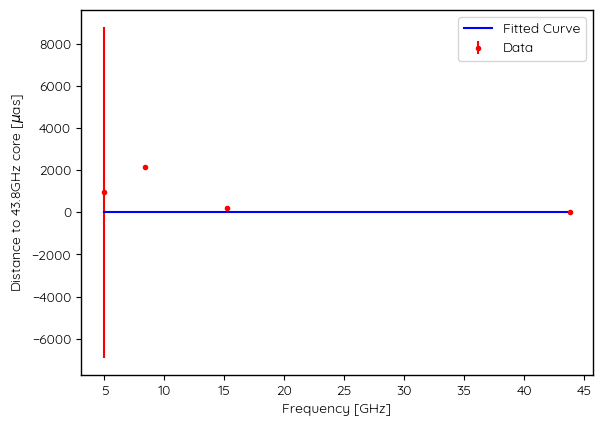

{'k_r': 8.505466604851758,
 'r0': 0.2989602461797234,
 'ref_freq': 43.787875,
 'freqs': array([ 4.979875,  8.415875, 15.247875, 43.787875]),
 'coreshifts': array([ 945.92709202, 2133.97126881,  212.72772881,    0.        ]),
 'coreshift_err': array([7863.88794794,  114.30556376,   97.32547638,  113.34346638])}

In [9]:
#In addition to the component spectrum, we can also derive the core shift, based on a given component
im_cube.fit_coreshift(5,plot=True)

In [10]:
#Additionally, we can have a look at different jet profiles, based on the modelfits.
#Let's say we want to plot the jet collimation profile, this can be done using:
x,y,y_err=im_cube.get_model_profile("maj",core_position=[0,0]) #other options are 'flux','tb'

In [11]:
#So far we have looked at a single-epoch multi-frequency dataset
#Let's also have a look at a single-frequency multi-epoch dataset
from vcat import ImageCube
import glob
#We will load some MOJAVE epochs of 0506+056 where modelfits were performed
uvf_files=glob.glob("../dataset_example/0506+056_kinematic/*.uvf")
model_files=glob.glob("../dataset_example/0506+056_kinematic/*fits")

#Let's load them as an ImageCube
im_cube=ImageCube().import_files(uvf_files=uvf_files,model_fits_files=model_files)

2025-09-13 14:01:37,264 - INFO - vcat - Importing images:
Processing: 100%|███████████████████████████████| 11/11 [01:34<00:00,  8.60s/it]
2025-09-13 14:03:11,860 - INFO - vcat - Imported 11 images successfully.


In [12]:
#We have already used the VCAT GUI to assign the component numbers, so we can load a component_info.csv file
import numpy as np
im_cube.import_component_association("../dataset_example/0506+056_kinematic/component_info.csv")

2025-09-13 14:03:11,865 - INFO - vcat - Importing component associations from ../dataset_example/0506+056_kinematic/component_info.csv.


/home/flep98/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:803: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
/home/flep98/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:488: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
/home/flep98/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/flep98/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/flep98/VCAT/vcat/kinematics.py:537: RuntimeWarning: invalid value encountered in divide
  chi2 = np.sum(((dist - y_model) / dist_err) ** 2)


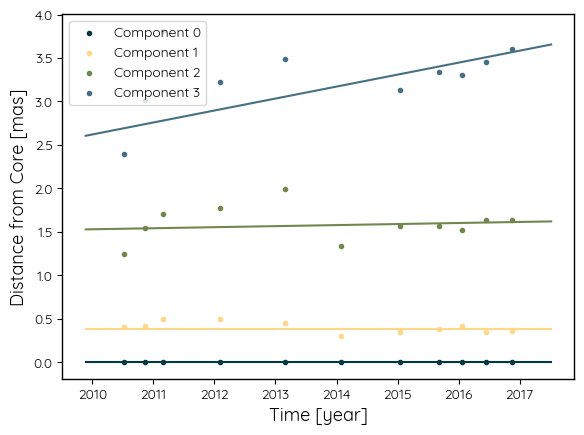

[{'name': 'Component 0', 'speed': 0.0, 'speed_err': inf, 'y0': -0.0, 'y0_err': -0.0, 'beta_app': 0.0, 'beta_app_err': nan, 'd_crit': 1.0, 'd_crit_err': nan, 'dist_0_est': -0.0, 't_0': 2010.5260273972603, 't_0_err': inf, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([   0.       , 2010.5260274]), 'cov_matrix': array([[inf, inf],
       [inf, inf]])}, {'name': 'Component 1', 'speed': 1.2848290631388283e-07, 'speed_err': 0.011345976092202193, 'y0': 0.3791696671090942, 'y0_err': -1.1657152633743184e-08, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.3791696671090942, 't_0': -2951129.2823870704, 't_0_err': 259900595683.86972, 'red_chi_sqr': 0.488033434116649, 't_mid': 2013.7029044090127, 'linear_fit': array([ 1.28482906e-07, -2.95112928e+06]), 'cov_matrix': array([[1.28731173e-04, 2.94882594e+09],
       [2.94882594e+09, 6.75483196e+22]])}, {'name': 'Component 2', 'speed': 0.01204250442935198, 'speed_err': 0.03315477063954693, 

In [13]:
#We now have an ImageCube with correctly labeled components, that means we can call the kinematic fit functions

#Let's do a simple 1d linear fit of the core distance vs time
fit=im_cube.get_speed(order=1,show_plot=True)

#The returned fit parameter includes useful information about the apparent speed, critical Doppler_factor etc. of each component
print(fit)

/home/flep98/VCAT/vcat/kinematics.py:473: RuntimeWarning: divide by zero encountered in divide
  linear_fit, cov_matrix = np.polyfit(time, dist, order, cov='scaled', w=1./dist_err)
/home/flep98/anaconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:663: RuntimeWarning: invalid value encountered in multiply
  rhs *= w
/home/flep98/anaconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
2025-09-13 14:03:12,199 - WARNING - vcat - Could not perform weighted fit for Component Component 0, will do unweighted.
/home/flep98/VCAT/vcat/kinematics.py:492: RuntimeWarning: invalid value encountered in double_scalars
  t_0 = - linear_fit[-1] / speed + t_mid
/home/flep98/VCAT/vcat/kinematics.py:494: RuntimeWarning: invalid value encountered in double_scalars
  t_0_err = np.sqrt((cov_matrix[-1, -1] / speed ** 2) + (linear_fit[-1] ** 2 * cov_matrix[0, 0] / speed ** 4))
/home/flep98/VCAT/vcat/kinematics.py:461: RuntimeW

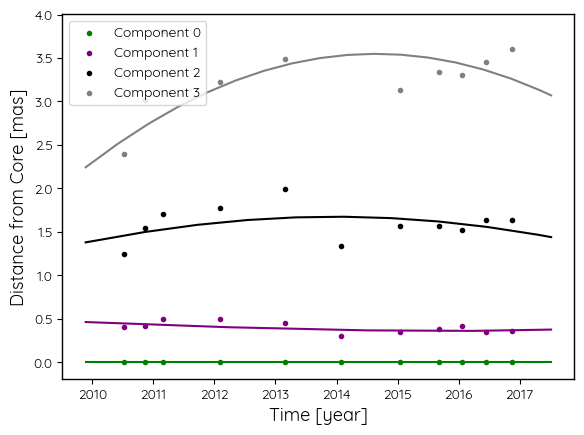

[[{'name': 'Component 0', 'speed': 0.0, 'speed_err': 0.0, 'y0': 0.0, 'y0_err': 0.0, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.0, 't_0': nan, 't_0_err': nan, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([0., 0., 0.]), 'cov_matrix': array([[ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [-0., -0.,  0.]])}, {'name': 'Component 0', 'speed': 0.0, 'speed_err': 0.0, 'y0': 0.0, 'y0_err': 0.0, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': 0.0, 't_0': nan, 't_0_err': nan, 'red_chi_sqr': nan, 't_mid': 2013.7029044090127, 'linear_fit': array([0., 0., 0.]), 'cov_matrix': array([[ 0.,  0., -0.],
       [ 0.,  0., -0.],
       [-0., -0.,  0.]])}], [{'name': 'Component 1', 'speed': 0.003777117640987248, 'speed_err': 0.002233159048081059, 'y0': -7.688005104797249, 'y0_err': 0.015068278048577136, 'beta_app': 0.0, 'beta_app_err': 0.0, 'd_crit': 1.0, 'd_crit_err': 0.0, 'dist_0_est': -7.68800510479

In [14]:
#Alternatively, we can fit x- and y-coordinates separately, and we can choose a n-th order polynom to fit
order=2

#additionally, we can adjust the plot colors
colors=["green","purple","black","gray"]
fit=im_cube.get_speed2d(order=order,colors=colors,show_plot=True)

#Again, the returned fit dictionaries include important information about the performed fit, this time, for x- and y
print(fit)

In [ ]:
#If you are feeling very fancy, you can also create a movie of the moving components (useful for talks!)
plot_components=True
n_frames=200 #number of frames
interval=50 #milliseconds per frame
save="kinematic_movie.mp4" #output file name

#usual plot parameters can be used here as well
xlim=[5,-5]
ylim=[-7,3]

#Let's create the movie (NOTE: This may take some time!)
im_cube.movie(plot_components=plot_components,n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#Let's display the movie
Video(save, embed=True)

2025-09-13 14:03:23,101 - INFO - vcat - Creating movie
Processing:   0%|                                       | 0/200 [00:00<?, ?it/s]2025-09-13 14:03:23,103 - INFO - matplotlib.animation - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-09-13 14:03:23,104 - INFO - matplotlib.animation - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -r 20 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y kinematic_movie.mp4
/home/flep98/VCAT/vcat/kinematics.py:111: RuntimeWarning: divide by zero encountered in double_scalars
  self.tb = 1.22e12/(self.freq*1e-9)**2 * self.flux * (1 + self.redshift) / (maj_for_tb*self.scale) / (min_for_tb*self.scale)   #Kovalev et al. 2005
/home/flep98/VCAT/vcat/kinematics.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  SNR_p = S_p/sigma_p
Processing:   6%|█▉                            | 13/200 [00:31<07:52,  2.53s/it]

In [ ]:
#Optionally, we can also display the components with a colormap, according to their flux density
fill_components=True
component_cmap="inferno"
save="kinematic_movie2.mp4"

#Let's create another movie
im_cube.movie(plot_components=True,fill_components=fill_components,component_cmap=component_cmap,
              n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#And display the movie
Video(save, embed=True)